In [1]:
from pylab import *
%matplotlib inline

Se utiliza el metodo de Runge Kutta con argumentos, como se vio en clase

In [2]:
def rk4(ec,p_ini,x,args=0,h=0.01):  
    if (x[1]-x[0]) <= 5*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Se define la ecuacion de movimiento de la pelota de masa m = 1


In [3]:
def e_mov(r_v,t,g=0,m=1):
    dx = r_v[2]
    dy = r_v[3]
    dvx,dvy = 0,-g # la fuerza gravitacional es en direccion perpendicular y sentido negativo
    return array([dx,dy,dvx,dvy]) #No se uso un modelo de friccion

Se definen las funciones de rebote

In [4]:
def rebote(r_v_i,mi_dt,b): # rebote en la circunferencia exterior
    dt_busqueda = (mi_dt)/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda])
    y_med = sol[-1,:]
    r_1 = sqrt((y_izq[0])**2 + (y_izq[1])**2)
    while r_1 > b : # en esta parte si el vector posicion de la pelota esta por fuera de la circunferencia 
        # exterior entra al ciclo, este es el unico cambio que se le hizo a este algoritmo visto en clase
        reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t,sol = rk4(e_mov,reinicio,[0,dt_busqueda])
        y_izq = reinicio
        y_med = sol[-1,:]
        r_1 = sqrt((y_izq[0])**2 + (y_izq[1])**2)
    
    v_per =  -y_izq[0],-y_izq[1] # se define un vector perpendicular a la circunferencia exterior
    ang = arccos((-v_per[0]*y_izq[2] - v_per[1]*y_izq[3])/(sqrt(y_izq[2]**2 + y_izq[3]**2)*sqrt(v_per[0]**2 + v_per[1]**2)))
    # Este es el angulo entre el vector  negativo de la velocidad  y el vector perpendicular a la superfice de rebote
    v_tan = v_per[1],-v_per[0]  # se define un vector tangencial a la circunferencia exterior 
    ang_aux = arccos((-v_tan[0]*y_izq[2] - v_tan[1]*y_izq[3])/(sqrt(y_izq[2]**2 + y_izq[3]**2)*sqrt(v_tan[0]**2 + v_tan[1]**2)))
    # Este es el angulo entre el vector  negativo de la velocidad  y el vector tangencial a la superfice de rebote   
    if ang_aux > (pi/2): # Si el angulo auxiliar es mayor a 90° el vector revotara en un angulo negativo respecto al vector normal
        ang= -ang
    else: # Si el angulo auxiliar es menor a 90° el vector revotara en un angulo positivo respecto al vector normal
        ang= ang    
    y_izq2 =  -cos(2*ang)*(y_izq[2]) + sin(2*ang)*(y_izq[3]) # una matriz de rotacion de 2(ang) aplicada al vector velocidad  
    y_izq3 =  -sin(2*ang)*(y_izq[2]) - cos(2*ang)*(y_izq[3]) # repecto al vector perpendicular a la circunferencia exterior
    y_izq = array([y_izq[0],y_izq[1],y_izq2,y_izq3])   
    return y_izq

In [5]:
def rebote2(r_v_i,mi_dt,a): # rebote en la circunferencia exterior
    dt_busqueda = (mi_dt)/2
    y_izq = r_v_i
    t,sol = rk4(e_mov,r_v_i,[0,dt_busqueda])
    y_med = sol[-1,:]
    r_1 = sqrt((y_izq[0])**2 + (y_izq[1])**2)
    while r_1 < a :  # en esta parte si el vector posicion de la pelota esta por dentro de la circunferencia 
        # interior entra al ciclo, este es el unico cambio que se le hizo a este algoritmo visto en clase
        reinicio = y_med
        dt_busqueda = dt_busqueda/2
        t,sol = rk4(e_mov,reinicio,[0,dt_busqueda])
        y_izq = reinicio
        y_med = sol[-1,:]
        r_1 = sqrt((y_izq[0])**2 + (y_izq[1])**2)
    v_per =  y_izq[0],y_izq[1] # se define un vector perpendicular a la circunferencia interior
    ang = arccos((-v_per[0]*y_izq[2] - v_per[1]*y_izq[3])/(sqrt(y_izq[2]**2 + y_izq[3]**2)*sqrt(v_per[0]**2 + v_per[1]**2)))
    # Este es el angulo entre el vector  de la velocidad  y el vector perpendicular a la superfice de rebote
    v_tan = v_per[1],-v_per[0] # se define un vector tangencial a la circunferencia interior    
    ang_aux = arccos((-v_tan[0]*y_izq[2] - v_tan[1]*y_izq[3])/(sqrt(y_izq[2]**2 + y_izq[3]**2)*sqrt(v_tan[0]**2 + v_tan[1]**2)))
    # Este es el angulo entre el vector  de la velocidad  y el vector tangencial a la superfice de rebote    
    if ang_aux > (pi/2): # Si el angulo auxiliar es mayor a 90° el vector revotara en un angulo negativo respecto al vector normal
        ang= -ang
    else: # Si el angulo auxiliar es menor a 90° el vector revotara en un angulo positivo respecto al vector normal
        ang= ang  
    y_izq2 =  -cos(2*ang)*(y_izq[2]) + sin(2*ang)*(y_izq[3]) # una matriz de rotacion de 2(ang) del vector velocidad   
    y_izq3 =  -sin(2*ang)*(y_izq[2]) - cos(2*ang)*(y_izq[3]) # repecto al vector normal a la circunferencia exterior
    y_izq = array([y_izq[0],y_izq[1],y_izq2,y_izq3])   
    return y_izq

Se define la funcion dona que busca los puntos de la trayectoria de la pelota dentro de la dona(caja)

In [6]:
def dona(x,y,vx,vy,N,g,a,b): # las dos primeras entradas corresponden a la posicion inicial de la pelora (x,y)
    # las siguientes dos estradas corresponde a las componetes de la velocidad incial de la pelota (vx,vy)
    # N = numero de puntos a calcular dentro de la trayectoria , g = aceleracion gravitacional y a,b radios de las cincuerferencias
    reb = 0 # contador de rebotes
    inicio = [x,y,vx,vy] # condiciones iniciales de la pelota 
    trayectoria = zeros((N,len(inicio)))
    mi_dt = .01
    trayectoria[0,:] = array(inicio)
    for i in range(N-1):
        t,sol_dt = rk4(e_mov,trayectoria[i,:],[0,mi_dt],g) # utiliza la funcion rk4 para encontrar la trayectoria
        r = sqrt((sol_dt[-1,:][1])**2 + (sol_dt[-1,:][0])**2)
        if r > b: # si la posicion en y de la pelota es mayor a la circunferencia exterior de radio b la pelota rebota
            punto = rebote(trayectoria[i,:],mi_dt,b)
            trayectoria[i+1,:] = punto 
            reb +=1
        else:
            trayectoria[i+1,:] = sol_dt[-1,:]      
        if r < a: # si la posicion en y de la pelota es menor a la circunferencia interior de radio a la pelota rebota
            punto = rebote2(trayectoria[i,:],mi_dt,a)
            trayectoria[i+1,:] = punto 
            reb +=1 # se agrega un contador a reb por cada rebote

    print "rebotes =",reb  # imprime el numero de rebotes
    return trayectoria[:,0],trayectoria[:,1],trayectoria[:,2],trayectoria[:,3]


a) Simulacion en donde la partıcula realiza varios rebotes en las paredes de la caja.
Suponga condiciones iniciales arbitrarias que le permitan hacer lo anterior

rebotes = 238


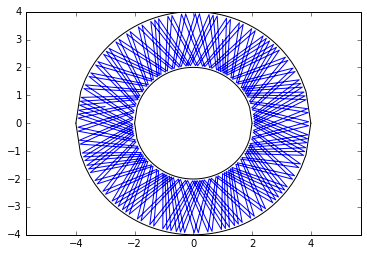

In [8]:
g = 0 # gravedad cero
N = 5000 # numero de puntos a calcular dentro de la trayectoria
a=2 # radio de la circunferencia interior
b=2*a # radio de la circunferencia exterior
sol = dona(1,3,.1,-10,N,g,a,b) # condiciones iniciales arbitrarias para la funcion dona
x=linspace(-b,b) # en esta parte se grafica una caja con forma de dona
z=linspace(-b,b)
v=linspace(-a,a)
w=linspace(-a,a)
plot(x,sqrt(-x**2 + b**2),'black',z,-sqrt(-z**2 + b**2),'black')
plot(v,sqrt(-v**2 + a**2),'black',w,-sqrt(-w**2 + a**2),'black')
plot(sol[0],sol[1]) # grafica los puntos de la trayectoria 
xlim([-b-1.7,b+1.7])
show()

(b) ¿Existen condiciones iniciales que hagan que la partícula quede encasillada en sólo un sector de
la caja?. De ser así muestre cales son tales condiciones o demuestre porque no se pueden obtener
dicha situacíon.

# No existen condiciones iniciales que confinen a la partícula en un solo sector de la caja, ya que el angulo de reflexión  de la partícula en cualquier pared de la caja respecto a la perpendicular de la pared, es igual al angulo de incidencia respecto a esta perpendicular, esto se debe a que por geometría el vector perpendicular en cada punto de las paredes circulares  es precisamente el vector en dirección radial respecto al centro de la caja. Si dividiéramos la caja en segmentos delimitados por lineas radiales, cuando la partícula rebota con cualquier pared de la caja con un angulo de incidencia (por mas pequeño que sea este) respecto a una linea (radial)  delimitante de un segmento de la caja, la partícula se vera reflejada con un angulo igual al de incidencia respecto a la linea delimitante, por lo tanto la partícula reflejad entrara a un nuevo segmento de la caja. esta misma situación se repite en cada segmento en que pudiéramos dividir la caja, hasta que la partícula pueda ocupar toda la caja 

c) Si ahora se tiene un campo gravitacional uniforme g = -10$\hat{j}$. Que condiciones iniciales se tendrıan
que cumplir para que la partıcula solo pueda ocupar la mitad de la dona.

rebotes = 109


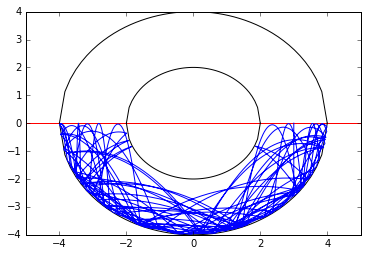

In [89]:
g = 10
N = 6000 # numero de puntos a calcular dentro de la trayectoria
a=2
b=2*a
sol = dona(3,0,0,0,N,g,a,b) 
x=linspace(-b,b)
z=linspace(-b,b)
v=linspace(-a,a)
w=linspace(-a,a)
plt.axhline(0,color='red') # la linea imaginaria roja divide la dona a la mitad
plot(x,sqrt(-x**2 + b**2),'black',z,-sqrt(-z**2 + b**2),'black')
plot(v,sqrt(-v**2 + a**2),'black',w,-sqrt(-w**2 + a**2),'black')
plot(sol[0],sol[1]) # grafica los puntos de la trayectoria 
xlim([-b-1,b+1])
show()

# Con el campo gravitaciónal en dirección -j. Una de las condiciones iniciales que confinen a la partícula a solo la mitad de la dona es: que la posición inicial de la partícula r(x,y) tenga y = 0 y la velocidad inicial  v(v_x,v_y) sea cero.

# Bajo estas condiciones la energía cinética inicial es cero y la energía potencial gravitacional es mg(h) donde h =(0-(-4)) = 4, como no hay fricción la energía se conserva, y como la energia inicial esta fija con h = 4, la partícula nunca tendrá suficiente energía cinética para llegar a h > 4 siendo h precisamente la altura de la mitad de la caja

# Otras condiciones iniciales para  cumplir la condición son: que la energía cinética inicial (con las respectivas componentes de velocidad) mas la energía potencial mg(h), h = (y+4) y con y =< 0, no sean mayores a la energía mg(h) con h = 4 del caso anterior